#Artificial Neural Network Assignment
###In this assignment you will be implementing various functions from scratch so as to learn how it functions before going on to use various libraries. Doing it honestly will help you a lot in you understanding of the topic. If you encounter difficulties or stuck somewhere go online and search, the possibility that you are encountering the problem first time in 8 billion people is very slim so mostly you will be able to find the solution. Happy learning! 😀

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [5]:
test = pd.read_csv('/mnist_test.csv')
train = pd.read_csv('/mnist_train.csv')

In [6]:
x_train = train.drop('label', axis=1)
x_train = x_train.T
x_train = x_train/255
y_train = train.label

x_test = test.drop('label',axis=1)
x_test = x_test.T
y_test = test.label
print(x_train)
print(y_train)

       0     1     2     3     4     5     6     7     8     9     ...  6291  \
1x1     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
1x2     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
1x3     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
1x4     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
1x5     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
28x24   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
28x25   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
28x26   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
28x27   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
28x28   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   

       6292  6293  6294  6295  6296  62

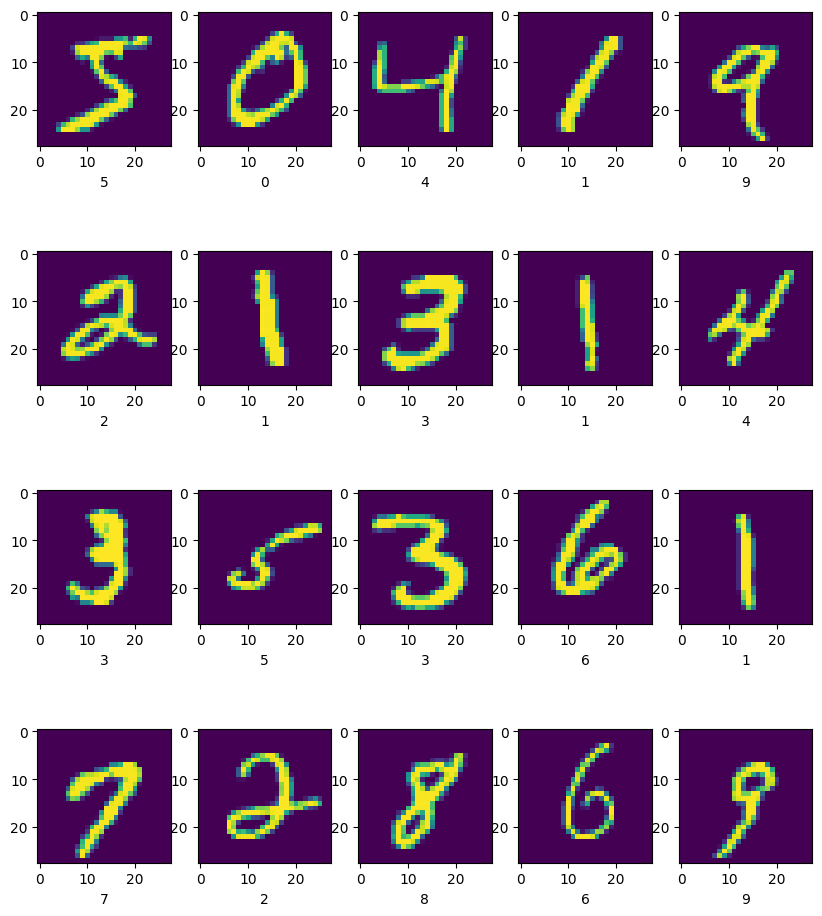

In [7]:
X_train_reshaped = x_train.T.values.reshape(-1, 28, 28)
plt.figure(figsize=(10, 15))
for i in range(20):
    plt.subplot(5, 5, i+1)
    plt.grid(False)
    plt.imshow(X_train_reshaped[i])
    plt.xlabel(y_train.iloc[i])

The remainder on dividing your roll number by 4 will dictate which function you have to complete but ofcourse if you wish to do more and there's no stopping you.\
Roll_number % 6  
                  0:RELU\
                  1:softmax\
                  2:forward_propogation\
                  3:one_hot_encode\
                  4:total_loss\
                  5:backward_propagation

In [29]:
class ANN:
    def __init__(self, input_size, output_size, learning_rate, num_layers, num_of_nodes_layers):
        self.input_size = input_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        self.num_layers = num_layers
        self.num_of_nodes_layers = num_of_nodes_layers
        self.weights_biases = {}
        self.activations = {}

    def initial_params(self):
        np.random.seed(20)
        self.weights_biases['W1'] = np.random.rand(self.num_of_nodes_layers, self.input_size) - 0.5
        self.weights_biases['b1'] = np.random.rand(self.num_of_nodes_layers, 1) - 0.5

        for i in range(2, self.num_layers + 1):
            self.weights_biases[f'W{i}'] = np.random.rand(self.num_of_nodes_layers, self.num_of_nodes_layers) - 0.5
            self.weights_biases[f'b{i}'] = np.random.rand(self.num_of_nodes_layers, 1) - 0.5

        self.weights_biases[f'W{self.num_layers + 1}'] = np.random.rand(self.output_size, self.num_of_nodes_layers) - 0.5
        self.weights_biases[f'b{self.num_layers + 1}'] = np.random.rand(self.output_size, 1) - 0.5

    def RELU(self, Z):
        return np.maximum(0, Z)

    def softmax(self, Z):
        Z_shift = Z - np.max(Z, axis=0, keepdims=True)
        exp_values = np.exp(Z_shift)
        exp_values_sum = np.sum(exp_values, axis=0, keepdims=True)
        return exp_values / exp_values_sum

    def forward_propagation(self, X):
        network = {}
        A = X
        for i in range(1, self.num_layers + 2):
            Z = np.dot(self.weights_biases[f'W{i}'], A) + self.weights_biases[f'b{i}']
            if i == self.num_layers + 1:
                A = self.softmax(Z)
            else:
                A = self.RELU(Z)

            network[f'Z{i}'] = Z
            network[f'A{i}'] = A

        return A, network

    def one_hot_encode(self, y):
        one_hot = np.zeros((y.max() + 1, y.size))
        one_hot[y, np.arange(y.size)] = 1
        return one_hot

    def total_loss(self, y_pred, Y):
        epsilon = 1e-8
        m = Y.shape[1]
        return -np.sum(Y * np.log(y_pred + epsilon)) / m

    def backward_prop(self, y_pred, Y, network):
        gradients = {}
        m = Y.shape[1]
        A_prev = X

        for i in reversed(range(1, self.num_layers + 2)):
          if i == self.num_layers + 1:
              dZ = network[f'A{i}'] - Y
          else:
              dA = np.dot(self.weights_biases[f'W{i+1}'].T, dZ)
              dZ = dA * (network[f'Z{i}'] > 0)

        dW = np.dot(dZ, network[f'A{i-1}'].T) / m if i > 1 else np.dot(dZ, X.T) / m
        db = np.sum(dZ, axis=1, keepdims=True) / m
        gradients[f'dW{i}'] = dW
        gradients[f'db{i}'] = db

        return gradients

    def update_params(self, gradients):
        for i in range(1, self.num_layers + 2):
            self.weights_biases[f"W{i}"] -= self.learning_rate * gradients[f"dW{i}"]
            self.weights_biases[f"b{i}"] -= self.learning_rate * gradients[f"db{i}"]

    def train(self, X, y, num_iterations):
        self.initial_params()
        Y = self.one_hot_encode(y)

        for i in range(num_iterations):
            y_pred, network = self.forward_propagation(X)
            loss = self.total_loss(y_pred, Y)
            if np.isnan(loss):
                print(f"NaN loss detected at iteration {i}")
                break
            gradients = self.backward_prop(y_pred, Y, network)
            self.update_params(gradients)
            if i % 100 == 0:
                print(f"Iteration {i}: Loss = {loss}")

    def predict(self, X):
        A, _ = self.forward_propagation(X)
        predictions = np.argmax(A, axis=0)
        return predictions

In [30]:
model = ANN(input_size=784, output_size=10, learning_rate=0.2, num_layers=3, num_of_nodes_layers=64)
model.train(x_train, y_train, num_iterations=4000)

NaN loss detected at iteration 0


In [23]:
m = model.predict(x_test)
b = m.shape
c = int(b[0])
d = np.array(y_test)
d = d.T
t=0
for i in range(c):
    if(m[i]==d[i]):
        t=t+1
print('Accuracy:',t/c *100, '%')



Accuracy: 11.511132164850782 %


3


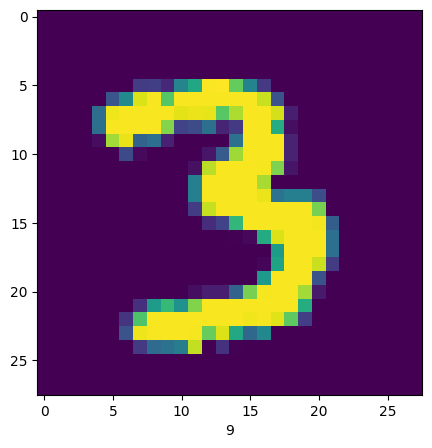

In [24]:
X_test_reshaped = x_test.T.values.reshape(-1, 28, 28)
plt.figure(figsize=(5, 5))
i = 500
print(d[i])
plt.imshow(X_test_reshaped[i])
plt.xlabel(m[i]);
